In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import Markdown

In [2]:
data = [
    ("Legacy", "Stemming", "../logs/With-Functions-10N_LEGACY_light_performance.csv"),
    ("Legacy", "Synonyms", "../logs/With-Synonyms-10N_LEGACY_light_performance.csv"),
    ("New", "Stemming", "../logs/With-Stemming-10N-NEW_light_performance.csv"),
    ("New", "Synonyms", "../logs/With-Synonyms_v2-10N-NEW_light_performance.csv"),
    ("New", "FastText-TC", "../logs/With-FastText_tc-10N-NEW_light_performance.csv"),
    ("New", "FastText-Base", "../logs/With-FastText_base-10N-NEW_light_performance.csv"),
]

In [3]:
data_sets = []
for version, name, path in data:
    d = pd.read_csv(path, usecols=['type', 'query', 'duration', 'latency'])
    d_words = d[d['type'] == 'word']
    d_phrase = d[d['type'] == 'phrase']
    data_sets.append((version, name, d_words, d_phrase))

In [4]:
data_sets[0][3].describe(include='all')

type                          query     duration      latency
count     1160                           1160  1160.000000  1160.000000
unique       1                            116          NaN          NaN
top     phrase  sind ringelröteln ansteckend?          NaN          NaN
freq      1160                             10          NaN          NaN
mean       NaN                            NaN     0.642726     0.395488
std        NaN                            NaN     0.099225     0.065131
min        NaN                            NaN     0.465618     0.240000
25%        NaN                            NaN     0.585845     0.352000
50%        NaN                            NaN     0.627206     0.388000
75%        NaN                            NaN     0.675215     0.428000
max        NaN                            NaN     1.727939     0.684000

In [5]:
latencies = []
for version, name, d_words, d_phrase in data_sets:
    lat_words = d_words.groupby('query')[['latency']].agg({'latency': [np.average]})
    lat_phrase = d_phrase.groupby('query')[['latency']].agg({'latency': [np.average]})
    
    latencies.append((version, name, lat_words, lat_phrase))

In [6]:
words = latencies[0][2].copy()
phrases = latencies[0][3].copy()
print(f"{latencies[0][0]}_{latencies[0][1]}")
for version, name, lat_words, lat_phrase in latencies[1:]:
    words = pd.merge(words, lat_words, on='query', how='inner', suffixes=('', f'_{version}_{name}'))
    phrases = pd.merge(phrases, lat_phrase, on='query', how='inner', suffixes=('', f'_{version}_{name}'))
    print(f"{version}_{name}")

words

Legacy_Stemming
Legacy_Synonyms
New_Stemming
New_Synonyms
New_FastText-TC
New_FastText-Base


latency latency_Legacy_Synonyms  \
                                         average                 average   
query                                                                      
"affenpocken symptome"                    0.1136                  0.7620   
"affenpocken übertragung"                 0.1125                  0.7621   
"aspirin complex"                         0.0968                  0.7515   
"bipolare störung"                        0.2468                  0.9256   
"chronisch obstruktive lungenerkrankung"  0.3924                  1.0404   
...                                          ...                     ...   
steptokokken                              0.4116                  1.0854   
symptome                                  0.3776                  1.0204   
umfrage                                   0.2345                  0.8740   
wetter                                    0.3008                  0.9568   
übelkeit                                  0.3320                  0.9477   

                                         latency_New_Stemming  \
                                                      average   
query                                                           
"affenpocken symptome"                                 0.1004   
"affenpocken übertragung"                              0.0548   
"aspirin complex"                                      0.0320   
"bipolare störung"                                     0.0676   
"chronisch obstruktive lungenerkrankung"               0.0956   
...                                                       ...   
steptokokken                                           0.0208   
symptome                                               0.0932   
umfrage                                                0.0416   
wetter                                                 0.0316   
übelkeit                                               0.0624   

                                         latency_New_Synonyms  \
                                                      average   
query                                                           
"affenpocken symptome"                                 0.1076   
"affenpocken übertragung"                              0.0684   
"aspirin complex"                                      0.0468   
"bipolare störung"                                     0.0804   
"chronisch obstruktive lungenerkrankung"               0.1004   
...                                                       ...   
steptokokken                                           0.0356   
symptome                                               0.1084   
umfrage                                                0.0556   
wetter                                                 0.0464   
übelkeit                                               0.0736   

                                         latency_New_FastText-TC  \
                                                         average   
query                                                              
"affenpocken symptome"                                    0.2781   
"affenpocken übertragung"                                 0.2620   
"aspirin complex"                                         0.3072   
"bipolare störung"                                        0.2120   
"chronisch obstruktive lungenerkrankung"                  0.3300   
...                                                          ...   
steptokokken                                              0.3053   
symptome                                                  0.2580   
umfrage                                                   0.3464   
wetter                                                    0.2440   
übelkeit                                                  0.2796   

                                         latency_New_FastText-Base  
                                                           average  
query                                                          

In [7]:
words.columns = words.columns.get_level_values(0)
words.rename(columns={'latency': f'latency_{latencies[0][0]}_{latencies[0][1]}'}, inplace=True)

words.rename(columns={'latency_Legacy_Stemming': f'Legacy-Stemming'}, inplace=True)
words.rename(columns={'latency_Legacy_Synonyms': f'Legacy-Synonyms'}, inplace=True)
words.rename(columns={'latency_New_Stemming': f'New-Stemming'}, inplace=True)
words.rename(columns={'latency_New_Synonyms': f'New-Synonyms'}, inplace=True)
words.rename(columns={'latency_New_FastText-TC': f'New-FastText-TC'}, inplace=True)
words.rename(columns={'latency_New_FastText-Base': f'New-FastText-Base'}, inplace=True)

phrases.columns = phrases.columns.get_level_values(0)
phrases.rename(columns={'latency': f'latency_{latencies[0][0]}_{latencies[0][1]}'}, inplace=True)

phrases.rename(columns={'latency_Legacy_Stemming': f'Legacy-Stemming'}, inplace=True)
phrases.rename(columns={'latency_Legacy_Synonyms': f'Legacy-Synonyms'}, inplace=True)
phrases.rename(columns={'latency_New_Stemming': f'New-Stemming'}, inplace=True)
phrases.rename(columns={'latency_New_Synonyms': f'New-Synonyms'}, inplace=True)
phrases.rename(columns={'latency_New_FastText-TC': f'New-FastText-TC'}, inplace=True)
phrases.rename(columns={'latency_New_FastText-Base': f'New-FastText-Base'}, inplace=True)

In [8]:
words

Legacy-Stemming  Legacy-Synonyms  \
query                                                                        
"affenpocken symptome"                             0.1136           0.7620   
"affenpocken übertragung"                          0.1125           0.7621   
"aspirin complex"                                  0.0968           0.7515   
"bipolare störung"                                 0.2468           0.9256   
"chronisch obstruktive lungenerkrankung"           0.3924           1.0404   
...                                                   ...              ...   
steptokokken                                       0.4116           1.0854   
symptome                                           0.3776           1.0204   
umfrage                                            0.2345           0.8740   
wetter                                             0.3008           0.9568   
übelkeit                                           0.3320           0.9477   

                                          New-Stemming  New-Synonyms  \
query                                                                  
"affenpocken symptome"                          0.1004        0.1076   
"affenpocken übertragung"                       0.0548        0.0684   
"aspirin complex"                               0.0320        0.0468   
"bipolare störung"                              0.0676        0.0804   
"chronisch obstruktive lungenerkrankung"        0.0956        0.1004   
...                                                ...           ...   
steptokokken                                    0.0208        0.0356   
symptome                                        0.0932        0.1084   
umfrage                                         0.0416        0.0556   
wetter                                          0.0316        0.0464   
übelkeit                                        0.0624        0.0736   

                                          New-FastText-TC  New-FastText-Base  
query                                                                         
"affenpocken symptome"                             0.2781             0.2764  
"affenpocken übertragung"                          0.2620             0.2148  
"aspirin complex"                                  0.3072             0.2896  
"bipolare störung"                                 0.2120             0.2076  
"chronisch obstruktive lungenerkrankung"           0.3300             0.2636  
...                                                   ...                ...  
steptokokken                                       0.3053             0.3220  
symptome                                           0.2580             0.2461  
umfrage                                            0.3464             0.0864  
wetter                                             0.2440             0.0829  
übelkeit                                           0.2796             0.0976  

[98 rows x 6 columns]

In [9]:
words.plot(kind='box', figsize=(8,6), grid=True, title='Latencies of word queries', rot=33, fontsize=13.0)

<Axes: title={'center': 'Latencies of word queries'}>

<Axes: title={'center': 'Latencies of phrase queries'}>

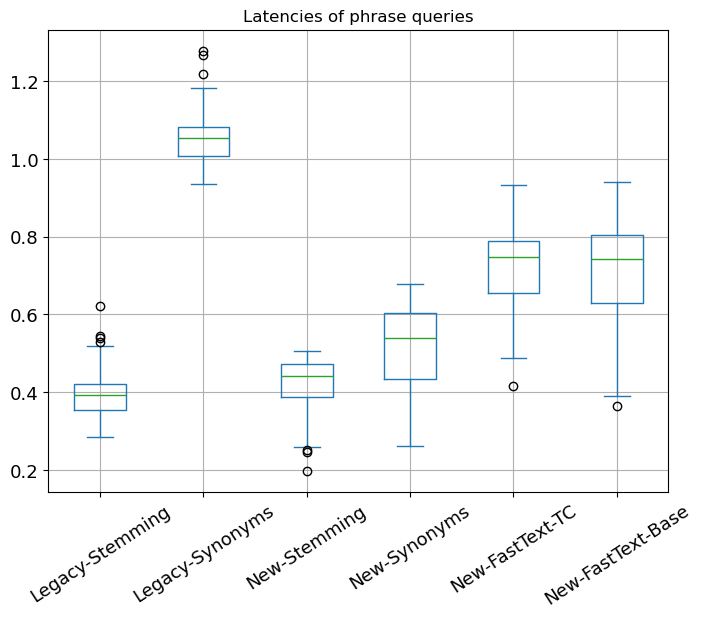

In [10]:
phrases.plot(kind='box', figsize=(8,6), grid=True, title='Latencies of phrase queries', rot=33, fontsize=13.0)

In [11]:
merged = pd.merge(words, phrases, on='query', how='outer', suffixes=('_W', f'_P'))
# merged

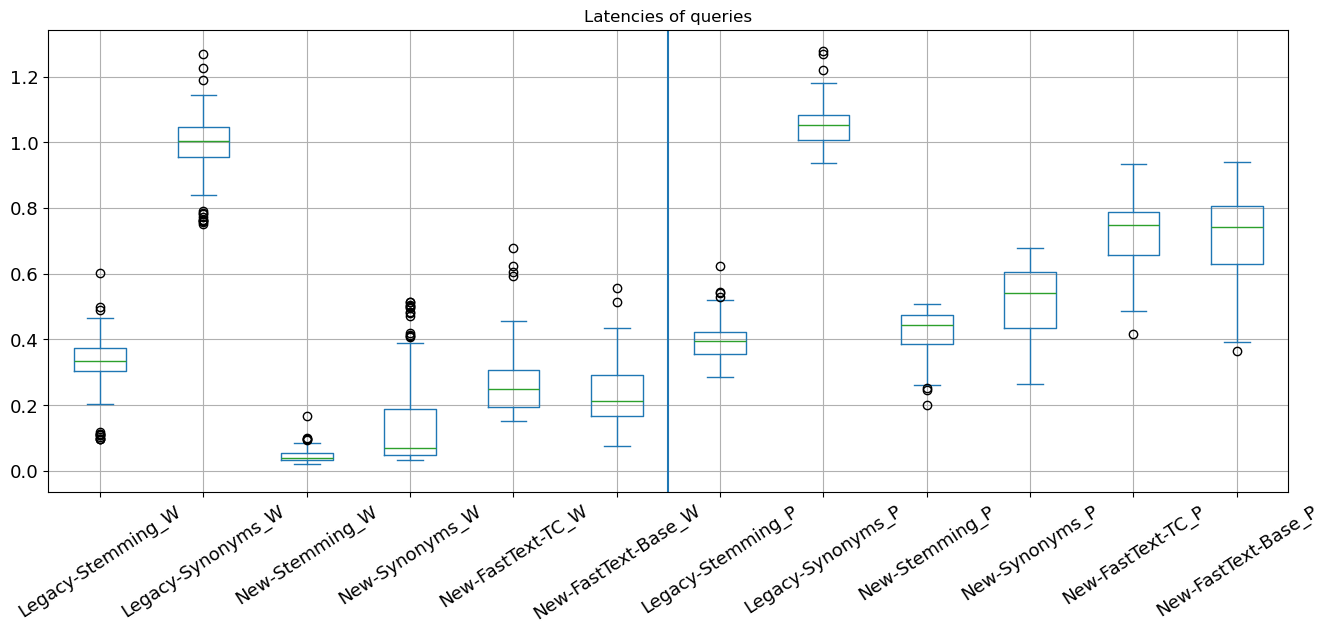

In [12]:
ax = merged.plot(kind='box', figsize=(16,6), grid=True, title='Latencies of queries', rot=33, fontsize=13.0)
ax.axline((6.5,0), (6.5,1))
ax.titlesize = 16

In [13]:
phrases.describe()

Legacy-Stemming  Legacy-Synonyms  New-Stemming  New-Synonyms  \
count       116.000000       116.000000    116.000000    116.000000   
mean          0.395488         1.049452      0.422415      0.514217   
std           0.057513         0.059595      0.065013      0.106318   
min           0.284800         0.935600      0.198900      0.263200   
25%           0.354325         1.006675      0.386675      0.434775   
50%           0.394050         1.052500      0.442400      0.540100   
75%           0.421300         1.081425      0.473025      0.604200   
max           0.622000         1.278200      0.506600      0.678800   

       New-FastText-TC  New-FastText-Base  
count       116.000000         116.000000  
mean          0.711134           0.708751  
std           0.107510           0.128302  
min           0.415200           0.364100  
25%           0.655475           0.629125  
50%           0.747500           0.741250  
75%           0.789250           0.804575  
max           0.933700           0.941200